# Analítica y Ciencia de Datos

## CIDE - Otoño 2015

### Árboles de Clasificación y Regresión

# Referencias

Capítulo 9 de [ESL](http://statweb.stanford.edu/~tibs/ElemStatLearn.1stEd/).

Capítulo 8 de [ISL](http://www-bcf.usc.edu/~gareth/ISL/)

[Capítulo 11 del Handbook of Statistics, Vol 23](http://mason.gmu.edu/~csutton/vt6.pdf)

[Capítulo 9 de *The Data Mining and Knowledge Discovery Handbook*](http://www.ise.bgu.ac.il/faculty/liorr/hbchap9.pdf)

Un descripción a profundidad del algoritmo de *Cost-Complexity Pruning* se puede ver [acá](http://www.cs.uu.nl/docs/vakken/mdm/trees.pdf%60)

# Árboles de Decisión


* En las notas anteriores vimos dos formas de estimar modelos no lineales: 

    * **Modelos no lineales de regresión**: hacer una aproximación de primer orden un modelo no lineal (en parámetros), y obtuvimos un método simple de actualización por medio de OLS iterativo.
    * **Modelos Aditivos Generalizados**
    

* Ahora vamos a ver una clase de modelos muy simples y poderosos: *árboles de decisión*.


* La idea es simple: los regresores $X_1, X_2, \cdots, X_p$ generan el espacio $X_1 \times X_2 \times \cdots \times X_p$


* Vamos a dividir este espacio en rectángulos: $R_m$


* La estimación de $y$ en $R_m$ es la media restringida a ese rectángulo.

# Ejemplo: dos regresores contínuos $X_1$, $X_2$

 ![caption](figures/cart_libro.png)
 
 [Figura 9.2 de ESL](http://statweb.stanford.edu/~tibs/ElemStatLearn.1stEd/)

# Aproximación de la función

* En el ejemplo anterior aproximamos la función que queremos aprender como 

$$
f(x) = \sum_{m=1}^5 c_m I\{(X_1, X_2) \in R_m\}
$$


* Podemos capturar no linealidades de los regresores que en pueden ser difíciles de capturar con otros modelos.


* La figura muestra que el *primer corte* se hace con el primer regresor $X_1$ utilizando el punto de corte o *threshold* $t_1$.

> Este corte hace una primera partición del espacio de regresores.


* El algoritmo se llama **CART (Classification and Regression Trees)** y sólo hace cortes binarios

    * En cada iteración busca simultáneamente el regresor que tiene un mayor poder predictivo y el punto de corte correspondiente.
    
    * En este caso la interpretación es simple: el regresor con mayor poder predictivo es $X_1$.
    

* Después explora cada lado del árbol:

* **A la izquierda**: condicionamos a $X_1 \leq t_1$ y buscamos nuevamente el regresor con mayor poder predictivo y el punto de corte correspondiente $(X_2, t_2)$.

* **A la derecha**: condicionamos a $X_1 > t_1$ y buscamos nuevamente el regresor con mayor poder predictivo y el punto de corte correspondiente $(X_1, t_3)$.


* Principal ventaja de los CART: son fáciles de explicar y de interpretar.


# Definiendo un árbol de decisión


* La figura muestra.

 ![caption](figures/binary_tree.png)
 
(Tomado de [acá](http://algs4.cs.princeton.edu/32bst/images/binary-tree-anatomy.png)) 

* Los árboles de decisión se leen de arriba hacia abajo.


* El primer nodo es el *nodo inicial*, *base* o *raíz*.

* Los **nodos finales** indican que no se hacen más cortes.

* Cada nodo genera un subárbol o *subtree* del árbol inicial.



# Árboles de regresión:


* Queremos modelar la función $f(x)$ como 

$$
f(x)  = \sum_{m=1}^M c_m I(x \in R_m)
$$


* Vamos a utilizar como criterio para comparar modelos la suma de residuos al cuadrado, así que vamos a buscar minimizarla.


* Si conociéramos las regiones, sabemos que el estimador de OLS es:

$$
c_m = \overline{y}_{x \in R_m}
$$


*  Cómo funciona el algoritmo:

* En cada iteración vamos a buscar simultáneamente el regresor y punto de corte correspondiente que minimizan el SSR, condicionando en la región en la que estamos buscando.

* **Primera iteración**:

    1. Loop sobre cada regresor $k$:

        * Loop sobre un grid de valores que puede tomar el regresor correspondiente: $t_k \in [\min X_k, \max X_k]$
        
        * Cada $t_k$ genera dos regiones y obtenemos la media de $y$ en esa región:  
$$
X_k \leq t_k \implies c_l\\
X_k > t_k \implies c_r
$$
        * Obtenemos el SSR correspondiente $\sum_i (y_i - c_l)^2 + (y_i - c_r)^2$ y lo guardamos.
        * Buscamos la combinación $(X_k, t_k)$ que minimiza el SSR
        

* Las demás iteraciones hacen lo mismo: pero tenemos que condicionar por la región en la que estamos buscando.

In [6]:
# Veamos un ejemplo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
#sys.path.append('//Users//danielvaughan//Documents//Python Scripts//')
sys.path.append('C:\\Users\\a3940004.EDIFICIOS\\Documents\\Python Scripts\\')
import olsdan as ols

# importemos los datos
#data = pd.read_csv('//Users//danielvaughan//Documents//Clase CIDE//Slides//Analitica//datasets//Credit.csv')
data = pd.read_csv(u'D:\\Míos\\Clase CIDE\\Slides\\Analitica\\New_CIDE_Analytics\\data\\Credit.csv')
N = data.shape[0]
dum_hombre     = np.asarray(data.Gender == ' Male').reshape((N,1))
dum_estudiante = np.asarray(data.Student == 'Yes').reshape((N,1))
dum_casado     = np.asarray(data.Married == 'Yes').reshape((N,1))
# Para etnicidad debemos excluir una variable que sirva como referencia:
dum_ethnic = np.asarray(pd.get_dummies(data.Ethnicity).iloc[:,:-1])
# etiquetas de X
labs_x = np.array(['Score','Ingreso',u'Límite de Crédito',u'Número Tarjetas','Edad',u'Educación'])
#,'Hombre','Estudiante','Casado','Caucasian','Asian'])
# incluyamos todas las variables:
prexmat = np.concatenate((
                        np.asarray(data.Rating).reshape((N,1)),
                        np.asarray(data.Income).reshape((N,1)),
                         np.asarray(data.Limit).reshape((N,1)),
                         np.asarray(data.Cards).reshape((N,1)),
                         np.asarray(data.Age).reshape((N,1)),
                         np.asarray(data.Education).reshape((N,1)),
                         ),axis=1)
saldo = np.asarray(data.Balance).reshape((N,1))
# transformemos el saldo: es positivo siempre, así que una log() nos da algo más parecido a una normal
yy    = np.log(saldo + 0.000001)

nvar = prexmat.shape[1]

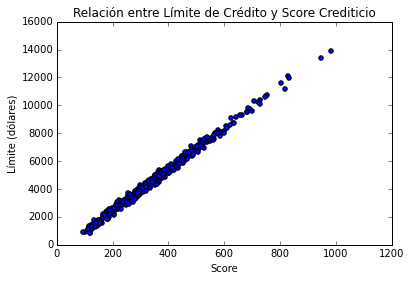

In [11]:
# Por qué están tan parecidas score y límite?  Correlación altísima: casi 1-1!
# así que eliminemos una.  
plt.scatter(data.Rating, data.Limit)
plt.title(u'Relación entre Límite de Crédito y Score Crediticio')
plt.ylabel(u'Límite (dólares)')
plt.xlabel('Score')


prexmat = np.concatenate((
                        np.asarray(data.Income).reshape((N,1)),
                         np.asarray(data.Limit).reshape((N,1)),
                         np.asarray(data.Cards).reshape((N,1)),
                         np.asarray(data.Age).reshape((N,1)),
                         np.asarray(data.Education).reshape((N,1)),
                         ),axis=1)
labs_x = np.array(['Ingreso',u'Límite de Crédito',u'Número Tarjetas','Edad',u'Educación'])
nvar = prexmat.shape[1]

la primera variable es:  Límite de Crédito
el punto de corte es:  3189.51666667


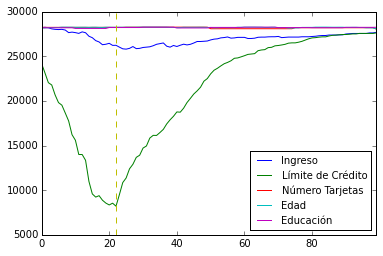

In [368]:
# primera iteracion
# Tamaño del grid
G = 100
# Queremos guardar los resultados acá
SSRMat = np.zeros((G,nvar))
for k in range(nvar):
    # seleccionemos la variable
    xk    = prexmat[:,k].copy()
    # el grid va a ser sobre los percentiles 5% y 95%
    q05   = np.percentile(xk,5)
    q95   = np.percentile(xk,95)
    gridk = np.linspace(q05,q95,G)
    # empezamos el loop sobre el grid
    for t in range(G):
        dum_kt = np.asarray(xk>gridk[t]).reshape((N,1))
        xmat   = np.concatenate((np.ones((N,1)), dum_kt),axis=1)
        olstk  = ols.ols_dan(yy, xmat)
        # guardemos el ssr
        SSRMat[t,k] = olstk.ssr()

# guardemos el menor, y el threshold correspondiente
ssr_min = SSRMat.min()        
var_min = np.dot(((SSRMat==ssr_min).mean(axis=0)>0),np.arange(nvar))
# ahora el threshold
xk    = prexmat[:,var_min].copy()
q05   = np.percentile(xk,5)
q95   = np.percentile(xk,95)
gridk = np.linspace(q05,q95,G)
ixmin = np.argmin(SSRMat[:,var_min])
thr_min = gridk[ixmin]
print 'la primera variable es: ', labs_x[var_min]
print 'el punto de corte es: ', thr_min

# grafiquémoslo
SSRMat = pd.DataFrame(SSRMat, columns = labs_x)
SSRMat.plot()        
plt.legend(loc='best', fontsize=10)
ymin, ymax = plt.ylim()
plt.plot([ixmin, ixmin],[ymin,ymax], ls='--')

#guardemos el threshold, y la variable
Nodes = list([[var_min,thr_min]])

la segunda variable es:  Límite de Crédito
el punto de corte es:  2724.14393939


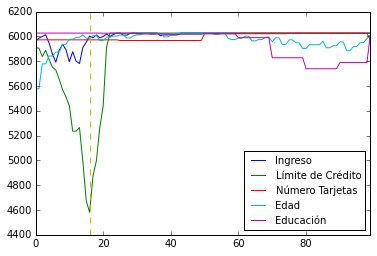

In [369]:
# Segunda Iteración: explorar a la izquierda de este primer nodo
# definamos la región donde queremos explorar:
ind_reg = prexmat[:,Nodes[0][0]] <= Nodes[0][1]
# podemos hacer un copy-paste del código anterior (sólo tenemos que tener cuidado con el ind_reg)
#--------------------------------------
# Queremos guardar los resultados acá
SSRMat = np.zeros((G,nvar))
for k in range(nvar):
    # seleccionemos la variable
    xk    = prexmat[:,k].copy()
    # el grid va a ser sobre los percentiles 5% y 95%
    q05   = np.percentile(xk,5)
    q95   = np.percentile(xk,95)
    gridk = np.linspace(q05,q95,G)
    # empezamos el loop sobre el grid
    for t in range(G):
        dum_kt = 1.0*(np.asarray(xk>gridk[t]).reshape((N,1)))
        # para condicionar que la búsqueda sea sobre ind_reg vamos a utilizar NaNs
        # LA FUNCION OLS_DAN ELIMINA LAS FILAS DONDE HAY NANS
        dum_kt[ind_reg==False] = np.nan
        xmat   = np.concatenate((np.ones((N,1)), dum_kt),axis=1)
        olstk  = ols.ols_dan(yy, xmat)
        # guardemos el ssr
        SSRMat[t,k] = olstk.ssr()

# guardemos el menor, y el threshold correspondiente
ssr_min = SSRMat.min()        
var_min = np.dot(((SSRMat==ssr_min).mean(axis=0)>0),np.arange(nvar))
# ahora el threshold
xk    = prexmat[:,var_min].copy()
q05   = np.percentile(xk,5)
q95   = np.percentile(xk,95)
gridk = np.linspace(q05,q95,G)
ixmin = np.argmin(SSRMat[:,var_min])
thr_min = gridk[ixmin]
print 'la segunda variable es: ', labs_x[var_min]
print 'el punto de corte es: ', thr_min

# grafiquémoslo
SSRMat = pd.DataFrame(SSRMat, columns = labs_x)
SSRMat.plot()        
plt.legend(loc='best', fontsize=10)
ymin, ymax = plt.ylim()
plt.plot([ixmin, ixmin],[ymin,ymax], ls='--')
#Actualicemos la lista donde guardamos el árbol
Nodes.append([Nodes[0],[var_min,thr_min]])
# Es útil guardar la región correspondiente al nodo que acabamos de explorar:
# Las columnas corresponderán al orden de los nodos
RegMat = np.concatenate((np.ones((N,1)),ind_reg.reshape((N,1))),axis=1)

la tercera variable es:  Límite de Crédito
el punto de corte es:  4663.1969697


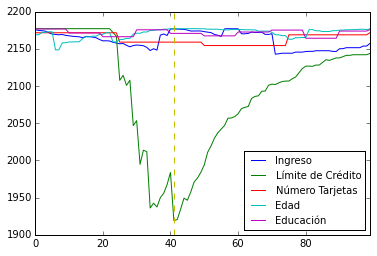

In [370]:
# Repitamos del lado derecho
# Segunda Iteración: explorar a la izquierda de este primer nodo
# definamos la región donde queremos explorar:
ind_reg = prexmat[:,Nodes[0][0]] > Nodes[0][1]
# podemos hacer un copy-paste del código anterior (sólo tenemos que tener cuidado con el ind_reg)
#--------------------------------------
# Queremos guardar los resultados acá
SSRMat = np.zeros((G,nvar))
for k in range(nvar):
    # seleccionemos la variable
    xk    = prexmat[:,k].copy()
    # el grid va a ser sobre los percentiles 5% y 95%
    q05   = np.percentile(xk,5)
    q95   = np.percentile(xk,95)
    gridk = np.linspace(q05,q95,G)
    # empezamos el loop sobre el grid
    for t in range(G):
        dum_kt = 1.0*(np.asarray(xk>gridk[t]).reshape((N,1)))
        # para condicionar que la búsqueda sea sobre ind_reg vamos a utilizar NaNs
        # LA FUNCION OLS_DAN ELIMINA LAS FILAS DONDE HAY NANS
        dum_kt[ind_reg==False] = np.nan
        xmat   = np.concatenate((np.ones((N,1)), dum_kt),axis=1)
        olstk  = ols.ols_dan(yy, xmat)
        # guardemos el ssr
        SSRMat[t,k] = olstk.ssr()

# guardemos el menor, y el threshold correspondiente
ssr_min = SSRMat.min()        
var_min = np.dot(((SSRMat==ssr_min).mean(axis=0)>0),np.arange(nvar))
# ahora el threshold
xk    = prexmat[:,var_min].copy()
q05   = np.percentile(xk,5)
q95   = np.percentile(xk,95)
gridk = np.linspace(q05,q95,G)
ixmin = np.argmin(SSRMat[:,var_min])
thr_min = gridk[ixmin]
print 'la tercera variable es: ', labs_x[var_min]
print 'el punto de corte es: ', thr_min

# grafiquémoslo
SSRMat = pd.DataFrame(SSRMat, columns = labs_x)
SSRMat.plot()        
plt.legend(loc='best', fontsize=10)
ymin, ymax = plt.ylim()
plt.plot([ixmin, ixmin],[ymin,ymax], ls='--')
#Actualicemos la lista donde guardamos el árbol
Nodes.append([Nodes[0],[var_min,thr_min]])
# Es útil guardar la región correspondiente al nodo que acabamos de explorar:
# Las columnas corresponderán al orden de los nodos
RegMat = np.concatenate((RegMat,ind_reg.reshape((N,1))),axis=1)

([], <a list of 0 Text yticklabel objects>)

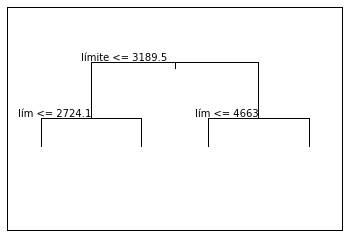

In [371]:
# Resumen hasta el momento
plt.plot([-10,10],[0,0], color='k')
plt.plot([0,0],[-0.1,0], color='k')
plt.text(-1,0,u'límite <= 3189.5', verticalalignment='bottom', horizontalalignment='right')
# siguiente nivel:
plt.plot([-10,-10],[-1,0], color='k')
plt.plot([10,10],[-1,0], color='k')
plt.plot([-16,-4],[-1,-1], color='k')
plt.plot([-16,-16],[-1.5,-1], color='k')
plt.plot([-4,-4],[-1.5,-1], color='k')
plt.plot([4,16],[-1,-1], color='k')
plt.plot([4,4],[-1.5,-1], color='k')
plt.plot([16,16],[-1.5,-1], color='k')
plt.text(-10,-1,u'lím <= 2724.1', verticalalignment='bottom', horizontalalignment='right')
plt.text(10,-1,u'lím <= 4663', verticalalignment='bottom', horizontalalignment='right')
# axis
plt.axis([-20,20,-3,1])
plt.xticks([])
plt.yticks([])

In [372]:
pd.DataFrame(RegMat==1).mean()

0    1.0000
1    0.2675
2    0.7325
dtype: float64

siguiente variable es:  Ingreso
el punto de corte es:  23.4079025253


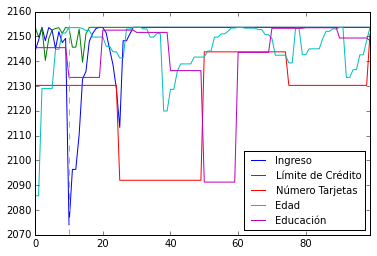

In [373]:
# Cuarta Iteración: explorar a la izquierda del segundo nodo
# Primero: obtengamos el padre de este nodo
padre  = Nodes[1][-1]
abuelo = Nodes[1][-2]
# definamos la región donde queremos explorar:
ind_reg = np.multiply(prexmat[:,padre[0]] <= padre[1],
                      prexmat[:,abuelo[0]] <= abuelo[1])
# podemos hacer un copy-paste del código anterior (sólo tenemos que tener cuidado con el ind_reg)
#--------------------------------------
# Queremos guardar los resultados acá
SSRMat = np.zeros((G,nvar))
for k in range(nvar):
    # seleccionemos la variable
    xk    = prexmat[:,k].copy()
    # el grid va a ser sobre los percentiles 5% y 95%
    q05   = np.percentile(xk,5)
    q95   = np.percentile(xk,95)
    gridk = np.linspace(q05,q95,G)
    # empezamos el loop sobre el grid
    for t in range(G):
        dum_kt = 1.0*(np.asarray(xk>gridk[t]).reshape((N,1)))
        # para condicionar que la búsqueda sea sobre ind_reg vamos a utilizar NaNs
        # LA FUNCION OLS_DAN ELIMINA LAS FILAS DONDE HAY NANS
        dum_kt[ind_reg==False] = np.nan
        xmat   = np.concatenate((np.ones((N,1)), dum_kt),axis=1)
        olstk  = ols.ols_dan(yy, xmat)
        # guardemos el ssr
        SSRMat[t,k] = olstk.ssr()

# guardemos el menor, y el threshold correspondiente
ssr_min = SSRMat.min()        
var_min = np.dot(((SSRMat==ssr_min).mean(axis=0)>0),np.arange(nvar))
# ahora el threshold
xk    = prexmat[:,var_min].copy()
q05   = np.percentile(xk,5)
q95   = np.percentile(xk,95)
gridk = np.linspace(q05,q95,G)
ixmin = np.argmin(SSRMat[:,var_min])
thr_min = gridk[ixmin]
print 'siguiente variable es: ', labs_x[var_min]
print 'el punto de corte es: ', thr_min

# grafiquémoslo
SSRMat = pd.DataFrame(SSRMat, columns = labs_x)
SSRMat.plot()        
plt.legend(loc='best', fontsize=10)
ymin, ymax = plt.ylim()
plt.plot([ixmin, ixmin],[ymin,ymax], ls='--')
#Actualicemos la lista donde guardamos el árbol
Nodes.append([Nodes[0],[var_min,thr_min]])
# Es útil guardar la región correspondiente al nodo que acabamos de explorar:
# Las columnas corresponderán al orden de los nodos
RegMat = np.concatenate((RegMat,ind_reg.reshape((N,1))),axis=1)

siguiente variable es:  Ingreso
el punto de corte es:  26.8104282828


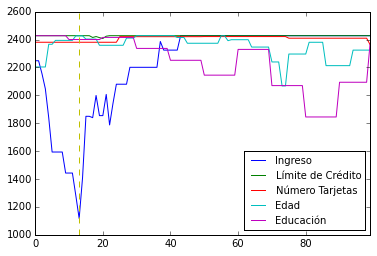

In [374]:
# Quinta Iteración: explorar a la derecha del segundo nodo
# Primero: obtengamos el padre de este nodo
padre  = Nodes[1][-1]
abuelo = Nodes[1][-2]
# definamos la región donde queremos explorar:
ind_reg = np.multiply(prexmat[:,padre[0]] > padre[1],
                      prexmat[:,abuelo[0]] <= abuelo[1])
# podemos hacer un copy-paste del código anterior (sólo tenemos que tener cuidado con el ind_reg)
#--------------------------------------
# Queremos guardar los resultados acá
SSRMat = np.zeros((G,nvar))
for k in range(nvar):
    # seleccionemos la variable
    xk    = prexmat[:,k].copy()
    # el grid va a ser sobre los percentiles 5% y 95%
    q05   = np.percentile(xk,5)
    q95   = np.percentile(xk,95)
    gridk = np.linspace(q05,q95,G)
    # empezamos el loop sobre el grid
    for t in range(G):
        dum_kt = 1.0*(np.asarray(xk>gridk[t]).reshape((N,1)))
        # para condicionar que la búsqueda sea sobre ind_reg vamos a utilizar NaNs
        # LA FUNCION OLS_DAN ELIMINA LAS FILAS DONDE HAY NANS
        dum_kt[ind_reg==False] = np.nan
        xmat   = np.concatenate((np.ones((N,1)), dum_kt),axis=1)
        olstk  = ols.ols_dan(yy, xmat)
        # guardemos el ssr
        SSRMat[t,k] = olstk.ssr()

# guardemos el menor, y el threshold correspondiente
ssr_min = SSRMat.min()        
var_min = np.dot(((SSRMat==ssr_min).mean(axis=0)>0),np.arange(nvar))
# ahora el threshold
xk    = prexmat[:,var_min].copy()
q05   = np.percentile(xk,5)
q95   = np.percentile(xk,95)
gridk = np.linspace(q05,q95,G)
ixmin = np.argmin(SSRMat[:,var_min])
thr_min = gridk[ixmin]
print 'siguiente variable es: ', labs_x[var_min]
print 'el punto de corte es: ', thr_min

# grafiquémoslo
SSRMat = pd.DataFrame(SSRMat, columns = labs_x)
SSRMat.plot()        
plt.legend(loc='best', fontsize=10)
ymin, ymax = plt.ylim()
plt.plot([ixmin, ixmin],[ymin,ymax], ls='--')
#Actualicemos la lista donde guardamos el árbol
Nodes.append([Nodes[0],[var_min,thr_min]])
# Es útil guardar la región correspondiente al nodo que acabamos de explorar:
# Las columnas corresponderán al orden de los nodos
RegMat = np.concatenate((RegMat,ind_reg.reshape((N,1))),axis=1)

siguiente variable es:  Ingreso
el punto de corte es:  58.5673353535


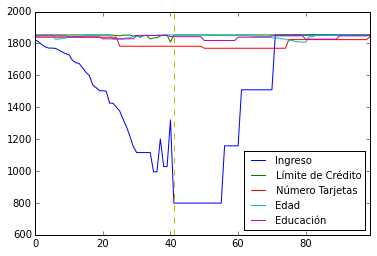

In [375]:
# Sexta Iteración: explorar a la derecha del segundo nodo
# Primero: obtengamos el padre de este nodo
padre  = Nodes[2][-1]
abuelo = Nodes[2][-2]
# definamos la región donde queremos explorar:
ind_reg = np.multiply(prexmat[:,padre[0]] <= padre[1],
                      prexmat[:,abuelo[0]] > abuelo[1])
# podemos hacer un copy-paste del código anterior (sólo tenemos que tener cuidado con el ind_reg)
#--------------------------------------
# Queremos guardar los resultados acá
SSRMat = np.zeros((G,nvar))
for k in range(nvar):
    # seleccionemos la variable
    xk    = prexmat[:,k].copy()
    # el grid va a ser sobre los percentiles 5% y 95%
    q05   = np.percentile(xk,5)
    q95   = np.percentile(xk,95)
    gridk = np.linspace(q05,q95,G)
    # empezamos el loop sobre el grid
    for t in range(G):
        dum_kt = 1.0*(np.asarray(xk>gridk[t]).reshape((N,1)))
        # para condicionar que la búsqueda sea sobre ind_reg vamos a utilizar NaNs
        # LA FUNCION OLS_DAN ELIMINA LAS FILAS DONDE HAY NANS
        dum_kt[ind_reg==False] = np.nan
        xmat   = np.concatenate((np.ones((N,1)), dum_kt),axis=1)
        olstk  = ols.ols_dan(yy, xmat)
        # guardemos el ssr
        SSRMat[t,k] = olstk.ssr()

# guardemos el menor, y el threshold correspondiente
ssr_min = SSRMat.min()        
var_min = np.dot(((SSRMat==ssr_min).mean(axis=0)>0),np.arange(nvar))
# ahora el threshold
xk    = prexmat[:,var_min].copy()
q05   = np.percentile(xk,5)
q95   = np.percentile(xk,95)
gridk = np.linspace(q05,q95,G)
ixmin = np.argmin(SSRMat[:,var_min])
thr_min = gridk[ixmin]
print 'siguiente variable es: ', labs_x[var_min]
print 'el punto de corte es: ', thr_min

# grafiquémoslo
SSRMat = pd.DataFrame(SSRMat, columns = labs_x)
SSRMat.plot()        
plt.legend(loc='best', fontsize=10)
ymin, ymax = plt.ylim()
plt.plot([ixmin, ixmin],[ymin,ymax], ls='--')
#Actualicemos la lista donde guardamos el árbol
Nodes.append([Nodes[0],[var_min,thr_min]])
# Es útil guardar la región correspondiente al nodo que acabamos de explorar:
# Las columnas corresponderán al orden de los nodos
RegMat = np.concatenate((RegMat,ind_reg.reshape((N,1))),axis=1)

siguiente variable es:  Límite de Crédito
el punto de corte es:  5361.25606061


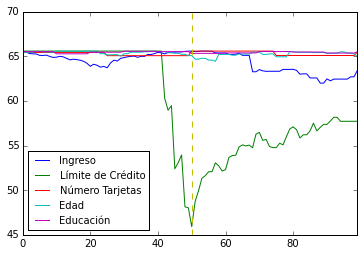

In [376]:
# Séptima Iteración: explorar a la derecha del segundo nodo
# Primero: obtengamos el padre de este nodo
padre  = Nodes[2][-1]
abuelo = Nodes[2][-2]
# definamos la región donde queremos explorar:
ind_reg = np.multiply(prexmat[:,padre[0]]  > padre[1],
                      prexmat[:,abuelo[0]] > abuelo[1])
# podemos hacer un copy-paste del código anterior (sólo tenemos que tener cuidado con el ind_reg)
#--------------------------------------
# Queremos guardar los resultados acá
SSRMat = np.zeros((G,nvar))
for k in range(nvar):
    # seleccionemos la variable
    xk    = prexmat[:,k].copy()
    # el grid va a ser sobre los percentiles 5% y 95%
    q05   = np.percentile(xk,5)
    q95   = np.percentile(xk,95)
    gridk = np.linspace(q05,q95,G)
    # empezamos el loop sobre el grid
    for t in range(G):
        dum_kt = 1.0*(np.asarray(xk>gridk[t]).reshape((N,1)))
        # para condicionar que la búsqueda sea sobre ind_reg vamos a utilizar NaNs
        # LA FUNCION OLS_DAN ELIMINA LAS FILAS DONDE HAY NANS
        dum_kt[ind_reg==False] = np.nan
        xmat   = np.concatenate((np.ones((N,1)), dum_kt),axis=1)
        olstk  = ols.ols_dan(yy, xmat)
        # guardemos el ssr
        SSRMat[t,k] = olstk.ssr()

# guardemos el menor, y el threshold correspondiente
ssr_min = SSRMat.min()        
var_min = np.dot(((SSRMat==ssr_min).mean(axis=0)>0),np.arange(nvar))
# ahora el threshold
xk    = prexmat[:,var_min].copy()
q05   = np.percentile(xk,5)
q95   = np.percentile(xk,95)
gridk = np.linspace(q05,q95,G)
ixmin = np.argmin(SSRMat[:,var_min])
thr_min = gridk[ixmin]
print 'siguiente variable es: ', labs_x[var_min]
print 'el punto de corte es: ', thr_min

# grafiquémoslo
SSRMat = pd.DataFrame(SSRMat, columns = labs_x)
SSRMat.plot()        
plt.legend(loc='best', fontsize=10)
ymin, ymax = plt.ylim()
plt.plot([ixmin, ixmin],[ymin,ymax], ls='--')
#Actualicemos la lista donde guardamos el árbol
Nodes.append([Nodes[0],[var_min,thr_min]])
# Es útil guardar la región correspondiente al nodo que acabamos de explorar:
# Las columnas corresponderán al orden de los nodos
RegMat = np.concatenate((RegMat,ind_reg.reshape((N,1))),axis=1)

In [377]:
# Confirmemos que hemos venido haciendo bien los cortes
pd.DataFrame(RegMat==1).mean()

0    1.0000
1    0.2675
2    0.7325
3    0.1975
4    0.0700
5    0.2375
6    0.4950
dtype: float64

In [378]:
Nodes

[[1, 3189.5166666666655],
 [[1, 3189.5166666666655], [1, 2724.1439393939386]],
 [[1, 3189.5166666666655], [1, 4663.1969696969682]],
 [[1, 3189.5166666666655], [0, 23.407902525252521]],
 [[1, 3189.5166666666655], [0, 26.810428282828276]],
 [[1, 3189.5166666666655], [0, 58.567335353535334]],
 [[1, 3189.5166666666655], [1, 5361.2560606060579]]]

siguiente variable es:  Ingreso
el punto de corte es:  22.2737272727


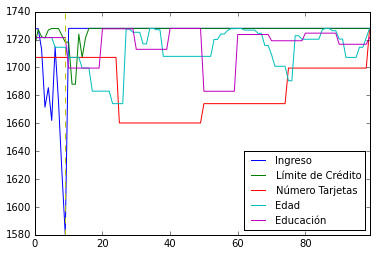

In [379]:
# Siguiente iteración
# Primero: obtengamos el padre de este nodo
padre  = Nodes[3][-1]
# definamos la región donde queremos explorar:
ind_reg = np.multiply(prexmat[:,padre[0]]  <= padre[1],
                      RegMat[:,3])
# podemos hacer un copy-paste del código anterior (sólo tenemos que tener cuidado con el ind_reg)
#--------------------------------------
# Queremos guardar los resultados acá
SSRMat = np.zeros((G,nvar))
for k in range(nvar):
    # seleccionemos la variable
    xk    = prexmat[:,k].copy()
    # el grid va a ser sobre los percentiles 5% y 95%
    q05   = np.percentile(xk,5)
    q95   = np.percentile(xk,95)
    gridk = np.linspace(q05,q95,G)
    # empezamos el loop sobre el grid
    for t in range(G):
        dum_kt = 1.0*(np.asarray(xk>gridk[t]).reshape((N,1)))
        # para condicionar que la búsqueda sea sobre ind_reg vamos a utilizar NaNs
        # LA FUNCION OLS_DAN ELIMINA LAS FILAS DONDE HAY NANS
        dum_kt[ind_reg==False] = np.nan
        xmat   = np.concatenate((np.ones((N,1)), dum_kt),axis=1)
        olstk  = ols.ols_dan(yy, xmat)
        # guardemos el ssr
        SSRMat[t,k] = olstk.ssr()

# guardemos el menor, y el threshold correspondiente
ssr_min = SSRMat.min()        
var_min = np.dot(((SSRMat==ssr_min).mean(axis=0)>0),np.arange(nvar))
# ahora el threshold
xk    = prexmat[:,var_min].copy()
q05   = np.percentile(xk,5)
q95   = np.percentile(xk,95)
gridk = np.linspace(q05,q95,G)
ixmin = np.argmin(SSRMat[:,var_min])
thr_min = gridk[ixmin]
print 'siguiente variable es: ', labs_x[var_min]
print 'el punto de corte es: ', thr_min

# grafiquémoslo
SSRMat = pd.DataFrame(SSRMat, columns = labs_x)
SSRMat.plot()        
plt.legend(loc='best', fontsize=10)
ymin, ymax = plt.ylim()
plt.plot([ixmin, ixmin],[ymin,ymax], ls='--')
#Actualicemos la lista donde guardamos el árbol
Nodes.append([Nodes[0],[var_min,thr_min]])
# Es útil guardar la región correspondiente al nodo que acabamos de explorar:
# Las columnas corresponderán al orden de los nodos
RegMat = np.concatenate((RegMat,ind_reg.reshape((N,1))),axis=1)

siguiente variable es:  Edad
el punto de corte es:  29.0


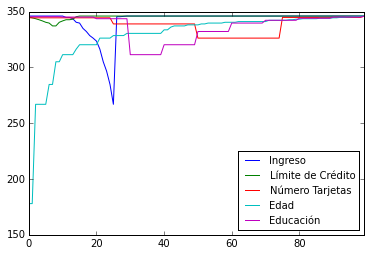

In [380]:
# Siguiente iteración
# Primero: obtengamos el padre de este nodo
padre  = Nodes[3][-1]
# definamos la región donde queremos explorar:
ind_reg = np.multiply(prexmat[:,padre[0]]  > padre[1],
                      RegMat[:,3])
# podemos hacer un copy-paste del código anterior (sólo tenemos que tener cuidado con el ind_reg)
#--------------------------------------
# Queremos guardar los resultados acá
SSRMat = np.zeros((G,nvar))
for k in range(nvar):
    # seleccionemos la variable
    xk    = prexmat[:,k].copy()
    # el grid va a ser sobre los percentiles 5% y 95%
    q05   = np.percentile(xk,5)
    q95   = np.percentile(xk,95)
    gridk = np.linspace(q05,q95,G)
    # empezamos el loop sobre el grid
    for t in range(G):
        dum_kt = 1.0*(np.asarray(xk>gridk[t]).reshape((N,1)))
        # para condicionar que la búsqueda sea sobre ind_reg vamos a utilizar NaNs
        # LA FUNCION OLS_DAN ELIMINA LAS FILAS DONDE HAY NANS
        dum_kt[ind_reg==False] = np.nan
        xmat   = np.concatenate((np.ones((N,1)), dum_kt),axis=1)
        olstk  = ols.ols_dan(yy, xmat)
        # guardemos el ssr
        SSRMat[t,k] = olstk.ssr()

# guardemos el menor, y el threshold correspondiente
ssr_min = SSRMat.min()        
var_min = np.dot(((SSRMat==ssr_min).mean(axis=0)>0),np.arange(nvar))
# ahora el threshold
xk    = prexmat[:,var_min].copy()
q05   = np.percentile(xk,5)
q95   = np.percentile(xk,95)
gridk = np.linspace(q05,q95,G)
ixmin = np.argmin(SSRMat[:,var_min])
thr_min = gridk[ixmin]
print 'siguiente variable es: ', labs_x[var_min]
print 'el punto de corte es: ', thr_min

# grafiquémoslo
SSRMat = pd.DataFrame(SSRMat, columns = labs_x)
SSRMat.plot()        
plt.legend(loc='best', fontsize=10)
ymin, ymax = plt.ylim()
plt.plot([ixmin, ixmin],[ymin,ymax], ls='--')
#Actualicemos la lista donde guardamos el árbol
Nodes.append([Nodes[0],[var_min,thr_min]])
# Es útil guardar la región correspondiente al nodo que acabamos de explorar:
# Las columnas corresponderán al orden de los nodos
RegMat = np.concatenate((RegMat,ind_reg.reshape((N,1))),axis=1)

siguiente variable es:  Ingreso
el punto de corte es:  15.4686757576


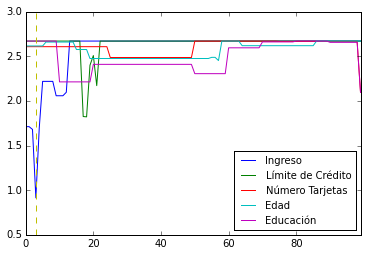

In [381]:
# Siguiente iteración
# Primero: obtengamos el padre de este nodo
padre  = Nodes[4][-1]
# definamos la región donde queremos explorar:
ind_reg = np.multiply(prexmat[:,padre[0]]  <= padre[1],
                      RegMat[:,4])
# podemos hacer un copy-paste del código anterior (sólo tenemos que tener cuidado con el ind_reg)
#--------------------------------------
# Queremos guardar los resultados acá
SSRMat = np.zeros((G,nvar))
for k in range(nvar):
    # seleccionemos la variable
    xk    = prexmat[:,k].copy()
    # el grid va a ser sobre los percentiles 5% y 95%
    q05   = np.percentile(xk,5)
    q95   = np.percentile(xk,95)
    gridk = np.linspace(q05,q95,G)
    # empezamos el loop sobre el grid
    for t in range(G):
        dum_kt = 1.0*(np.asarray(xk>gridk[t]).reshape((N,1)))
        # para condicionar que la búsqueda sea sobre ind_reg vamos a utilizar NaNs
        # LA FUNCION OLS_DAN ELIMINA LAS FILAS DONDE HAY NANS
        dum_kt[ind_reg==False] = np.nan
        xmat   = np.concatenate((np.ones((N,1)), dum_kt),axis=1)
        olstk  = ols.ols_dan(yy, xmat)
        # guardemos el ssr
        SSRMat[t,k] = olstk.ssr()

# guardemos el menor, y el threshold correspondiente
ssr_min = SSRMat.min()        
var_min = np.dot(((SSRMat==ssr_min).mean(axis=0)>0),np.arange(nvar))
# ahora el threshold
xk    = prexmat[:,var_min].copy()
q05   = np.percentile(xk,5)
q95   = np.percentile(xk,95)
gridk = np.linspace(q05,q95,G)
ixmin = np.argmin(SSRMat[:,var_min])
thr_min = gridk[ixmin]
print 'siguiente variable es: ', labs_x[var_min]
print 'el punto de corte es: ', thr_min

# grafiquémoslo
SSRMat = pd.DataFrame(SSRMat, columns = labs_x)
SSRMat.plot()        
plt.legend(loc='best', fontsize=10)
ymin, ymax = plt.ylim()
plt.plot([ixmin, ixmin],[ymin,ymax], ls='--')
#Actualicemos la lista donde guardamos el árbol
Nodes.append([Nodes[0],[var_min,thr_min]])
# Es útil guardar la región correspondiente al nodo que acabamos de explorar:
# Las columnas corresponderán al orden de los nodos
RegMat = np.concatenate((RegMat,ind_reg.reshape((N,1))),axis=1)

siguiente variable es:  Educación
el punto de corte es:  16.2828282828


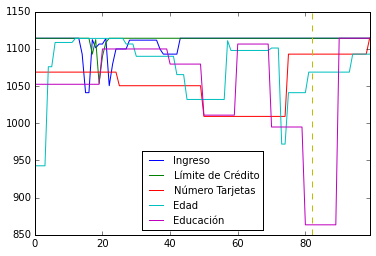

In [382]:
# Siguiente iteración
# Primero: obtengamos el padre de este nodo
padre  = Nodes[4][-1]
# definamos la región donde queremos explorar:
ind_reg = np.multiply(prexmat[:,padre[0]]  > padre[1],
                      RegMat[:,4])
# podemos hacer un copy-paste del código anterior (sólo tenemos que tener cuidado con el ind_reg)
#--------------------------------------
# Queremos guardar los resultados acá
SSRMat = np.zeros((G,nvar))
for k in range(nvar):
    # seleccionemos la variable
    xk    = prexmat[:,k].copy()
    # el grid va a ser sobre los percentiles 5% y 95%
    q05   = np.percentile(xk,5)
    q95   = np.percentile(xk,95)
    gridk = np.linspace(q05,q95,G)
    # empezamos el loop sobre el grid
    for t in range(G):
        dum_kt = 1.0*(np.asarray(xk>gridk[t]).reshape((N,1)))
        # para condicionar que la búsqueda sea sobre ind_reg vamos a utilizar NaNs
        # LA FUNCION OLS_DAN ELIMINA LAS FILAS DONDE HAY NANS
        dum_kt[ind_reg==False] = np.nan
        xmat   = np.concatenate((np.ones((N,1)), dum_kt),axis=1)
        olstk  = ols.ols_dan(yy, xmat)
        # guardemos el ssr
        SSRMat[t,k] = olstk.ssr()

# guardemos el menor, y el threshold correspondiente
ssr_min = SSRMat.min()        
var_min = np.dot(((SSRMat==ssr_min).mean(axis=0)>0),np.arange(nvar))
# ahora el threshold
xk    = prexmat[:,var_min].copy()
q05   = np.percentile(xk,5)
q95   = np.percentile(xk,95)
gridk = np.linspace(q05,q95,G)
ixmin = np.argmin(SSRMat[:,var_min])
thr_min = gridk[ixmin]
print 'siguiente variable es: ', labs_x[var_min]
print 'el punto de corte es: ', thr_min

# grafiquémoslo
SSRMat = pd.DataFrame(SSRMat, columns = labs_x)
SSRMat.plot()        
plt.legend(loc='best', fontsize=10)
ymin, ymax = plt.ylim()
plt.plot([ixmin, ixmin],[ymin,ymax], ls='--')
#Actualicemos la lista donde guardamos el árbol
Nodes.append([Nodes[0],[var_min,thr_min]])
# Es útil guardar la región correspondiente al nodo que acabamos de explorar:
# Las columnas corresponderán al orden de los nodos
RegMat = np.concatenate((RegMat,ind_reg.reshape((N,1))),axis=1)

siguiente variable es:  Ingreso
el punto de corte es:  52.8964590909


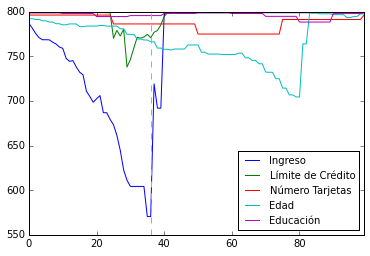

In [383]:
# Siguiente iteración
# Primero: obtengamos el padre de este nodo
padre  = Nodes[5][-1]
# definamos la región donde queremos explorar:
ind_reg = np.multiply(prexmat[:,padre[0]]  <= padre[1],
                      RegMat[:,5])
# podemos hacer un copy-paste del código anterior (sólo tenemos que tener cuidado con el ind_reg)
#--------------------------------------
# Queremos guardar los resultados acá
SSRMat = np.zeros((G,nvar))
for k in range(nvar):
    # seleccionemos la variable
    xk    = prexmat[:,k].copy()
    # el grid va a ser sobre los percentiles 5% y 95%
    q05   = np.percentile(xk,5)
    q95   = np.percentile(xk,95)
    gridk = np.linspace(q05,q95,G)
    # empezamos el loop sobre el grid
    for t in range(G):
        dum_kt = 1.0*(np.asarray(xk>gridk[t]).reshape((N,1)))
        # para condicionar que la búsqueda sea sobre ind_reg vamos a utilizar NaNs
        # LA FUNCION OLS_DAN ELIMINA LAS FILAS DONDE HAY NANS
        dum_kt[ind_reg==False] = np.nan
        xmat   = np.concatenate((np.ones((N,1)), dum_kt),axis=1)
        olstk  = ols.ols_dan(yy, xmat)
        # guardemos el ssr
        SSRMat[t,k] = olstk.ssr()

# guardemos el menor, y el threshold correspondiente
ssr_min = SSRMat.min()        
var_min = np.dot(((SSRMat==ssr_min).mean(axis=0)>0),np.arange(nvar))
# ahora el threshold
xk    = prexmat[:,var_min].copy()
q05   = np.percentile(xk,5)
q95   = np.percentile(xk,95)
gridk = np.linspace(q05,q95,G)
ixmin = np.argmin(SSRMat[:,var_min])
thr_min = gridk[ixmin]
print 'siguiente variable es: ', labs_x[var_min]
print 'el punto de corte es: ', thr_min

# grafiquémoslo
SSRMat = pd.DataFrame(SSRMat, columns = labs_x)
SSRMat.plot()        
plt.legend(loc='best', fontsize=10)
ymin, ymax = plt.ylim()
plt.plot([ixmin, ixmin],[ymin,ymax], ls='--')
#Actualicemos la lista donde guardamos el árbol
Nodes.append([Nodes[0],[var_min,thr_min]])
# Es útil guardar la región correspondiente al nodo que acabamos de explorar:
# Las columnas corresponderán al orden de los nodos
RegMat = np.concatenate((RegMat,ind_reg.reshape((N,1))),axis=1)

In [384]:
# Siguiente iteración
# Primero: obtengamos el padre de este nodo
padre  = Nodes[5][-1]
# definamos la región donde queremos explorar:
ind_reg = np.multiply(prexmat[:,padre[0]]  > padre[1],
                      RegMat[:,5])
# miremos que tenemos el mínimo de observaciones necesario
print ind_reg.sum()


3.0


# Resumen del algoritmo:

* Ya vimos que el proceso es simple pero tiene una única complicación:

> **Es fundamental saber en qué región estamos explorando (RegMat) y en qué nodo estamos**


* La región, nodos y sus antescesores fueron actualizados iterativamente, explorando el árbol de arriba a abajo (naturalmente) y de izquierda a derecha (esto no es necesario, se puede hacer una exploración por ramas).


* Un algoritmo haría esto con un loop.

# ¿Cómo funciona el algoritmo con variables categóricas?


* Las iteraciones anteriores se hicieron con variables continuas.


* Para cada variable $k$, se evaluaron diferentes puntos de corte $t_{kj}$, y se calcularon variables dummies $X_k \leq t_{kj}$.


* Pero esto no se puede hacer con variables categóricas.


* Tomemos el caso de una variable dummy $D_i \in \{0,1\}$.


* En este caso el grid tiene sólo dos valores, así que es inmediato calcular el $SSR$:

$$
\sum_i (y_i - c_{D=0})^2 + (y_i - c_{D=1})^2
$$


* O en nuestro algoritmo, corremos la regresión 
$$
y_i = \alpha + \beta D_i + \epsilon_i
$$

y guardamos el $SSR$ correspondiente.


* En el caso de más de dos categorías incluimos todas las variables dummy correspondientes *excluyendo* la categoría de referencia.

# CART con Scikit-learn


* Ya vimos cómo funciona el algoritmo.


* Una ventaja que tiene usar Scikit-learn es que nos permite estimar un CART fácilmente, pero sobre todo **visualizarlo**.


* El proceso no es inmediato: se necesita tener instalado [Graphviz](http://www.graphviz.org/).


* Yo instalé [esta versión (Mac OS)](http://www.ryandesign.com/graphviz/) y tuve que actualizar mi [XQuartz](http://xquartz.macosforge.org/).


* También instalé la versión de Windows.


* Una vez instalado tienen que incluir la carpeta en el `PATH`.

In [14]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(prexmat, yy)
labs_x = np.array(['Ingreso',u'CredLim',u'NumTarjetas','Edad',u'Edu'])


tree.export_graphviz(clf,out_file='tree.dot', feature_names=labs_x) 

# Graphviz

* Una vez tenemos el archivo `tree.dot` necesitamos la función `dot` de Graphviz para convertirlo a `.png`:


* Ver [la documentación oficial](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html).


* Dada mi instalación de Graphviz (y que no cambié el path), tuve que hacer lo siguiente:


>  `/usr/local/graphviz-2.14/bin/dot -Tpng tree.dot -o tree.png`




 ![caption](figures/tree4.png)

# Modelos de *Clasificación*

* Como su nombre lo indica, los CART sirven también para clasificar.


* Supongamos que tenemos $K \geq 2$ categorías.


* Al igual que en el caso de regresión, cada nodo $m$ representa una región $R_m$ con $n_m$ observaciones.


* Definamos la probabilidad de asignar correctamente a categoría $k$ en el nodo $m$: 

$$
\hat{p}_{mk} = \frac{1}{n_m} \sum_{x_i \in R_m} I(y_{i}=k) 
$$


* En el nodo $m$ clasificamos una observación en la categoría 

$$
k(m) = \arg \max_{k} \hat{p}_{km}
$$

# Métricas de ajuste o pureza


* En regresión utilizamos el $SSR$ para seleccionar la región y el regresor correspondiente.


* En clasificación hay tres candidatos (pero sólo se utilizan los últimos dos):


**Error de Clasificación:**

$$
\frac{1}{n_m} \sum_{x_i \in R_m} I (y_i \neq k(m)) = 1- \hat{p}_{mk(m)}
$$


**Índice de Gini** (no confundir con el coeficiente de Gini!):

$$
\sum_k \hat{p}_{mk}(1-\hat{p}_{mk}) = 1 - \sum_k \hat{p}_{mk}^2
$$


**Entropía cruzada o *deviance*:**

$$
- \sum_k \hat{p}_{mk} \log(\hat{p}_{mk})
$$


* Intuitivamente un nodo es *puro* cuando las observaciones se clasifican en una sola categoría.




# En el caso de 2 categorías

![caption](figures/purity.png)

[Figura 9.3 de ESL](http://statweb.stanford.edu/~tibs/ElemStatLearn.1stEd/)

# Interpretación


* El *Índice de Gini* es muy bajo cuando todos los $\hat{p}_{mk}$ están cerca a cero o a uno.

> **Por esto se considera que es una medida de la *pureza* del nodo.  
Un valor bajo significa que se clasifican las observaciones predominantemente en una categoría.**

> Se puede interpretar como la varianza en la clasificación: deseamos alta pureza y baja varianza.

* La *entropía cruzada* siempre es positiva:  

$$
\hat{p}_{mk} \in [0,1] \implies \log(\hat{p}_{mk}) <0
$$


> También es muy bajo cuando todos los $\hat{p}_{mk}$ están cerca a cero o uno.

# Cómo se calcula la "impureza" de un nodo


* Tomemos como ejemplo el primer nodo (raíz o inicial).


* En ese nodo no hay restricciones sobre el espacio de regresores, así que tomamos la probabilidad incondicional:


* **Veamos el caso del Gini (la entropía es análogo)**:

$$
\begin{eqnarray*}
Gini_{root} &=& 1 - \hat{Prob}(y=1)^2 - \hat{Prob}(y=0)^2 \\
&=& 1 - \left( \frac{\# \{y_i = 1 \}}{N}\right)^2 - \left( \frac{\# \{y_i = 0\}}{N}\right)^2
\end{eqnarray*}
$$


* Si sólo tenemos observaciones con $y=1$ o $y=2$, tenemos un nodo raíz totalmente puro y el Gini es uno.

# Cómo seleccionamos el primer corte: variable continua



* Supongamos que tenemos una candidata $X_1$ que es una variable continua que toma valores en el rango $[\underline{x}, \bar{x} ]$


* Tomemos un punto de corte candidato $\psi \in [\underline{x}, \bar{x} ]$


* Este punto de corte genera dos regiones 
$$
R_l = X_1 \times \cdots \times X_p |_{X_1 \leq \psi} \\
R_r = X_1 \times \cdots \times X_p |_{X_1 > \psi}
$$

* Así que tenemos dos Ginis, uno para $R_l$ y otro para $R_r$:

$$
G_l = 1 - \hat{Prob}(y=1|R_l)^2 - \hat{Prob}(y=0|R_l)^2 \\
G_r = 1 - \hat{Prob}(y=1|R_r)^2 - \hat{Prob}(y=0|R_r)^2 \\
$$


* El Gini asociado no es más que el *valor esperado* (condicional al nodo padre, que en este caso es la raíz)

$$
E(G) = prob(R_l)G_l + prob(R_r)G_r
$$

donde $prob(R_l)$ es la fracción de observaciones que están en $R_l$, es decir 
$$
\frac{\#\{i: x_{1i} \leq \psi \}}{N}
$$


* El *loop* busca todos los posibles $\phi_k$, y obtiene, para cada variable, el corte que minimiza el índice de Gini.


* Al final seleccionamos la variable que tenga el menor Gini, y su punto de corte correspondiente.

# Qué pasa en los siguientes cortes?



* El proceso continua, pero hay que tener en cuenta que las probabilidades son condicionales a estar en la región actual.


* En cada corte hay dos pasos:

    * **Cálculo del Gini de cada rama**: hay que condicionar por $R_p \cap R_{rama}$, donde $R_p$ es la región del nodo padre.

    * **Cálculo de las probabilides condicionales**: 


así, en la rama izquierda del nodo $p$
$$
prob(R_l|R_p) = \frac{\#\{i: x_{1i} \leq \psi \wedge i \in R_p\}}{N_p}
$$


In [114]:
# veamos un ejemplo
#data  = pd.read_excel('//Users//danielvaughan//Documents//Clase CIDE//Slides//Analitica//datasets//data_tarea6.xlsx')
data  = pd.read_excel('E:\\Slides\\Analitica\\datasets\\data_tarea6.xlsx')

N  = data.shape[0]
nobs = N
yy    = 1*np.asarray(data.UN_MESES_SINPAGO>0).reshape((nobs,1))
male  = 1*np.asarray(data.SEXO=='M').reshape((nobs,1))
edad  = np.asarray(data.EDAD_CLIENTE).reshape((nobs,1))
payr  = np.asarray(data.PAYRATIO_PROM_6M_ANTES).reshape((nobs,1))
saldo = np.asarray(data.BALANCE_PROM_6M_ANTES).reshape((nobs,1))
uso   = np.asarray(data.USOVECES_PROM_6M_ANTES).reshape((nobs,1))
score = np.asarray(data.SCORE_LAST).reshape((nobs,1)).astype('float')
score[score<0] = np.nan
# regresores continuos
prexmat = np.concatenate((edad, payr, saldo, uso, score,male),axis=1)
labs_x  = np.array(['Edad','PayR','Saldo','Uso','Score','Hombre'])
nvar = prexmat.shape[1]

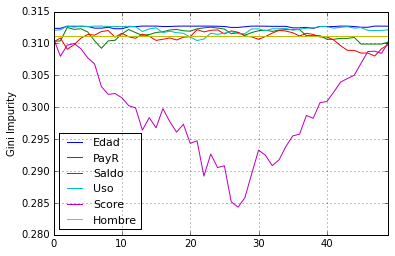

In [153]:
G = 50
ImpMat  = np.zeros((G,nvar))
for k in range(nvar):
    # seleccionemos la variable
    xk    = prexmat[:,k].copy()
    # miremos si es continua (ordinal) o categórica (en este caso sólo dos categorías)
    cont_chk = pd.Series(xk).unique().shape[0]>2
    if cont_chk==True:
        # el grid va a ser sobre los percentiles 5% y 95%
        q05   = np.percentile(pd.Series(xk).dropna(),5)
        q95   = np.percentile(pd.Series(xk).dropna(),95)
        gridk = np.linspace(q05,q95,G)
        # empezamos el loop sobre el grid
        for t in range(G):
            # Definamos la región actual
            dum_kt = (np.asarray(xk<=gridk[t])).flatten()
            # NaNs de la región deben corresponder a las variables
            dum_kt[np.isnan(xk)] = np.nan
            #---------------------------------------
            # Ahora miremos las medidas de impurity:
            #---------------------------------------
            # Primero: las probabilidades de caer a la izquierda o derecha 
            frac_l = (dum_kt==True).mean()
            frac_r = (dum_kt==False).mean()
            # Segundo: Probabilidad condicional de estar en la categoría 1 (en el corte actual)
            p_mk_l = np.nanmean(yy[dum_kt==True])
            p_mk_r = np.nanmean(yy[dum_kt==False])
            # 1. Gini en cada lado del nodo
            gini_l = 1 - p_mk_l**2 - (1-p_mk_l)**2
            gini_r = 1 - p_mk_r**2 - (1-p_mk_r)**2
            sum_gini    = frac_l*gini_l + frac_r*gini_r
            ImpMat[t,k] = sum_gini
    else:
        # Para las variables categóricas: cada región es una categoría
        # En este caso (hombre=1) se que los valores son 1 y cero
        dum_kt = (xk==True)
        dum_kt[np.isnan(xk)] = np.nan
        # Primero: las probabilidades de caer a la izquierda o derecha 
        frac_l = (dum_kt==True).mean()
        frac_r = (dum_kt==False).mean()
        # Segundo: Probabilidad condicional de estar en la categoría 1 (en el corte actual)
        p_mk_l = np.nanmean(yy[dum_kt==True])
        p_mk_r = np.nanmean(yy[dum_kt==False])
        # 1. Gini en cada lado del nodo
        gini_l = 1 - p_mk_l**2 - (1-p_mk_l)**2
        gini_r = 1 - p_mk_r**2 - (1-p_mk_r)**2
        sum_gini    = frac_l*gini_l + frac_r*gini_r
        ImpMat[:,k] = sum_gini

pd.DataFrame(ImpMat, columns = labs_x).plot()
plt.legend(loc='best', fontsize=11)
plt.ylabel('Gini Impurity')

# Temas Adicionales de Árboles:

## 1. Qué tan grande debe ser un árbol

## 2. Bagging

## 3. Random Forests

Estos temas son un poco más avanzados, así que los veremos un poco más superficialmente.  Quiénes estén interesados en profundizar en estos temas pueden ver las referencias del principio.

# Qué tan grande debe ser un árbol


* Arriba vimos cómo hacer crecer un árbol de regresión o de clasificación.


* La pregunta es qué tan grande debe ser el árbol.


* Una primer criterio es que el árbol debe crecer hasta que haya por lo menos un mínimo de observaciones en cada región.

    * Por ejemplo: cada región debe tener al menos cinco observaciones.
    

* Hay que recordar que cada rama adicional *restringe* el espacio de los regresores donde exploramos.


* Las regiones que se forman están anidadas en el sentido que la región generada por un nodo está estrictamente contenida por la región del padre de este nodo (de su antecesor).

$$
R_{p(n)} \subset R_n
$$

* Esto garantiza que los árboles no pueden crecer indefinidamente.

# Cost-complexity Pruning


* Una vez que crecemos un árbol lo suficientemente grande podemos proceder a podarlo.


* En la terminología de árboles de decisión esto se conoce como *poda* o **pruning**.


* Hay varios métodos pero acá vamos a ver uno ampliamente utilizado: *cost-complexity pruning*


* La intuición del método es sencilla:


* A medida que crecemos un árbol, cae el sesgo pero aumenta la varianza de la estimación.

    * El argumento es igual al utilizado cuando hablamos de sobreajuste polinomial.


* Vamos a buscar una forma de penalizar nuestra función objetivo para que balancee el tradeoff entre un mayor ajuste y una mayor complejidad.


* En el caso de regresión, crecimos árboles que minimicen el MSE, o equivalentemente, la suma de residuos al cuadrado (SSR).



$$
SSR_{\alpha}(T) = SSR(T) + \alpha |T|
$$


donde $|T|$ denota el número de *nodos terminales o finales* del árbol $T$, y $\alpha$ es un parámetro de penalización (que buscaremos óptimamente por validación cruzada).

# Cómo se podan los árboles?  


*  Cada nodo no terminal genera un subárbol:

![caption](figures/pruning.png)
 
(Tomado de [acá](http://www.uni-weimar.de/medien/webis/teaching/lecturenotes/machine-learning/unit-en-decision-trees-pruning.pdf)) 


* Así, si eliminamos un subárbol (dejando como nodo terminal el nodo inicial del subárbol) obtenemos versiones menos complejas del árbol que crecimos originalmente.


* Se puede mostrar que para cada valor de $\alpha$ hay un subárbol óptimo (que minimiza $SSR_{\alpha}(T)$).

# Podando los árboles


* Hay algoritmos eficientes que permiten construir una sucesión anidada de árboles óptimos para cada valor de $\alpha$.

    * Ver [acá](http://www.cs.uu.nl/docs/vakken/mdm/trees.pdf) o [acá](http://sites.stat.psu.edu/~jiali/course/stat597e/notes2/trees2.pdf), por ejemplo.


* Aunque Scikit-learn no permite *pruning* en su versión actual, hay alternativas compatibles con este módulo.

    * Ver [acá](https://github.com/sgenoud/scikit-learn/blob/4a75a4aaebd45e864e28cfca897121d1199e41d9/sklearn/tree/tree.py)
    
  
* El blog [Triangle Inequality](https://triangleinequality.wordpress.com/) tiene tres entradas muy buenas de cómo construir, crecer y [podar](https://triangleinequality.wordpress.com/2013/09/01/decision-trees-part-3-pruning-your-tree/) árboles en Python.

# Bagging: bootstrap aggregation


* Los árboles de decisión tienen varias ventajas:

    1. Permiten capturar nolinealidades que pueden ser difíciles con otros modelos.
    2. Hacen una segmentación del espacio de regresores.
    3. Son fáciles de presentar visualmente (si el árbol es chico).
    
    
* Sin embargo, pueden ser muy sensibles a inclusión de variables o cambio de muestras:

    * La razón es que los árboles simultáneamente buscan el regresor y el punto de corte para la muestra de entrenamiento.
    
    * Así, la estructura de un árbol puede cambiar drásticamente con muestras diferentes.
    
    
* El **bootstrap aggregation**, o *bagging*, permite lidiar precisamente con esta alta varianza.

# Bagging: (cont.)

* La idea es simple:

> Vamos a crecer $B$ árboles con **muestras de entrenamiento** diferentes (con las mismas características del bootstrapping que vimos antes).

Al final, la decisión es el promedio de las decisiones que obtuvimos.

* Así, por ejemplo, si en el árbol $1$, el individuo $i$ estaba en la región $R^1_k$ con $\bar{y}_{R^1_k} = c_k$, y en el árbol $2$ en la región $R^2_l$ con promedio $c_l$, la predicción de bagging para este individuo es:
$$
\hat{y}^{b}_i = \frac{c_k + c_l}{2}
$$


* En el caso de un modelo de clasificación, se puede utilizar una *regla de la mayoría*: el individuo $i$ se clasifica en la categoría que tuvo más *votos*, es decir, la categoría que apareció más frecuentemente en los resultados de las $B$ clasificaciones.


* En *bagging* no es necesario podar los árboles: lo recomendable es hacer crecer varios árboles los suficientmente grandes en cada una de las muestras de bootstrap.


* En Scikit-learn se pueden utilizar los métodos [BaggingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) o [BaggingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)

# Random Forests: 


* Un problema de *bagging* es que las variables más importantes suelen ser seleccionadas temprano cuando se crecen árboles.


* Así, aunque utilicemos distintas muestras de bootstrap, los correspondientes árboles suelen tener estructuras similares.


* Para reducir aún más la varianza de la estimación se pueden crecer *bosques aleatorios* o *random forests*.


* La idea es muy simple:

    1. Se van a crecer $B$ árboles con cada muestra de boostrap como en bagging.
    2. Para garantizar que los árboles tienen estructuras diferentes, en cada iteración seleccionamos una muestra aleatoria de los regresores candidatos en cada rama del árbol.
    
    
* Scikit-learn tiene módulos de [clasificación](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) y [regresión](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) para crecer bosques aleatorios.